In [2]:
import pandas as pd
file = "/Users/srijanagella/Documents/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(20)


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [3]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'its', 'can', "she's", 'being', "wouldn't", 'off', "should've", 'll', 'is', 'too', 'for', 'in', "that'll", 'them', 'did', 'such', 'her', 'only', 'hasn', 'couldn', 'further', 'you', 'his', 'down', 'has', "you've", 'doesn', 'just', 'any', 'doing', 'am', 'hadn', 'other', 'shouldn', 'against', 'nor', 'why', 'through', 'was', "couldn't", 'that', 'under', 'ourselves', 'won', 'wasn', 'we', 'don', 'the', 'again', 'once', 're', 've', 'some', 'those', 'needn', 'whom', 'they', 'have', 'each', 'i', "mustn't", 'because', 'same', 'which', 'by', 'own', 'but', "aren't", 'haven', 'itself', 'who', 'yourself', 'your', 'myself', 'd', "didn't", 'himself', 'there', 'an', "weren't", 'up', 'where', 'with', 'than', 'had', 'to', 'wouldn', 'do', 'over', 'until', 'after', 'most', 'he', 'this', 'themselves', "shouldn't", 'during', 'were', 'so', 'hers', 'both', 'about', 'if', 'ain', "won't", 'should', 'from', "needn't", 'these', 'at', "it's", "haven't", 'while', 'between', "shan't", 'it', 'or', 'very', 'more', 'di

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srijanagella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import regex as re

In [5]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
        return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [7]:
from collections import Counter
import pandas as pd

counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
token,
,20574172
e,13845550
t,10978480
i,8896896
n,8892770
o,8867221
a,8734251
s,6785113
r,6745620


In [12]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [14]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
,20574172,2057417.2
e,13845550,1384555.0
t,10978480,1097848.0
i,8896896,889689.6
n,8892770,889277.0


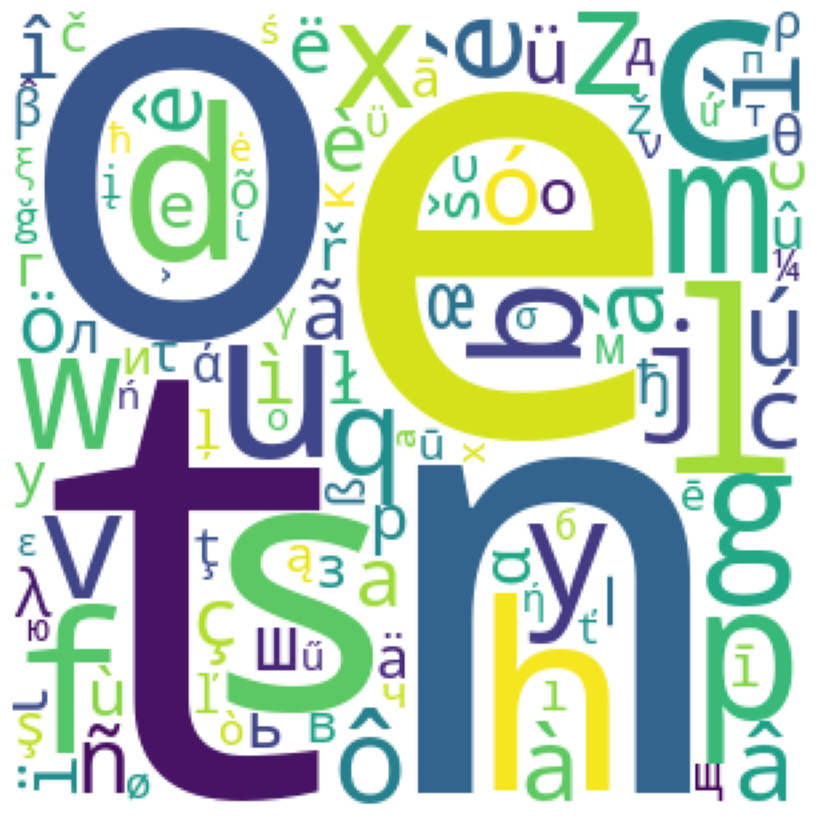

In [18]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Concatenate all tokens into a single string with space as separator
text = ' '.join(freq_df.index)

# Create WordCloud object
wc = WordCloud(background_color='white', width=300, height=300, margin=2)

# Generate WordCloud from the concatenated text
wc.generate(text)

# Display WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
